<h1 align='center'>Mô Hình Linear Regression Đơn Và Đa Biến</h1>
<h1 align='center'>Đỗ Trọng Khánh - 19521676</h1>

# Connect Driver

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Import Libary

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Simple linear regression

## Prepare Data

In [ ]:
data_link = '/gdrive/MyDrive/Colab Notebooks/Lập trình Python cho Máy học/Week 7/Data/Salary_Data.csv'
data = pd.read_csv(data_link)

In [ ]:
df = pd.DataFrame(data)
X_data = df.iloc[:, 0:-1];
Y_data = df.iloc[:, -1:];

X_data_np = X_data.to_numpy()
Y_data_np = Y_data.to_numpy()

## Visualize Data

In [ ]:
def visualize_data(X_data, Y_data, model):
    sns.set()
    a = model.coef_[0] # Hệ số dự đoán cho từng dữ liệu
    b = model.intercept_[0] # Lấy hằng số của hàm quyết định
    x_max = np.max(X_data)
    x_min = np.min(X_data)

    x = [i for i in np.arange(x_min, x_max, 0.01)]
    y = a*x + b
    plt.plot(x, y, color="red")
    plt.scatter(X_data, Y_data)
    plt.xlabel('YearsExperience')
    plt.ylabel('Salary')
    plt.show()

## Tranning and evaluate model

### Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LinearRegression_model = LinearRegression()

	R2_Score: 0.8742256057843416


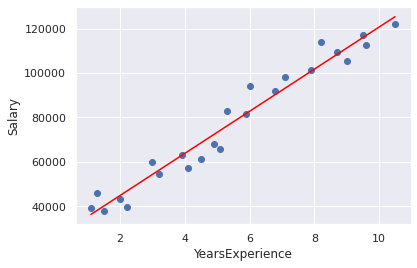

In [ ]:
kfold = KFold(5, True, 1);
score_list = [];

# Sử dụng kfold để chia dữ liệu và đánh giá mô hình
for train, test in kfold.split(X_data_np, Y_data_np):
    X_train, X_test = X_data_np[train], X_data_np[test];
    Y_train, Y_test = Y_data_np[train], Y_data_np[test];
    
    LinearRegression_model.fit(X_train, Y_train);
    y_pred = LinearRegression_model.predict(X_test)
    score_list.append(r2_score(y_pred, Y_test, sample_weight=None))

print('\tR2_Score:', np.mean(score_list))
visualize_data(X_train, Y_train, LinearRegression_model)

# Multiple linear regression

## Prepare Data

In [ ]:
data_link = '/gdrive/MyDrive/Colab Notebooks/Lập trình Python cho Máy học/Week 7/Data/50_Startups.csv'
data = pd.read_csv(data_link)

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df = pd.DataFrame(data)
X_data = df.iloc[:, 0:-2];
Y_data = df.iloc[:, -1:];

In [ ]:
x_profit_state = df['State'].to_numpy().reshape(-1, 1)

onehot_encoder = OneHotEncoder()
x_profit_state = onehot_encoder.fit_transform(x_profit_state).toarray()

X_data = np.hstack([X_data, x_profit_state])

In [ ]:
Y_data = Y_data.to_numpy()

## Tranning and evaluate model

### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LinearRegression_model = LinearRegression()

	R2_Score: 0.8898522301315502


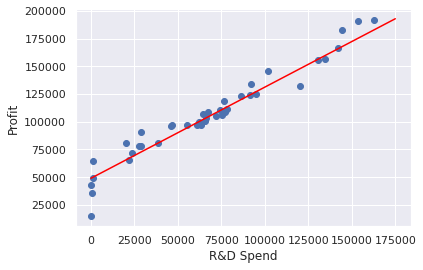

In [ ]:
kfold = KFold(5, True, 1);

score_list = [];
for train, test in kfold.split(X_data, Y_data):
    X_train, X_test = X_data[train], X_data[test];
    Y_train, Y_test = Y_data[train], Y_data[test];
    
    LinearRegression_model.fit(X_train, Y_train);
    y_pred = LinearRegression_model.predict(X_test)
    score_list.append(r2_score(y_pred, Y_test, sample_weight=None))

print('\tR2_Score:', np.mean(score_list))

# Visualising data
sns.set()
x = np.arange(0, 175000).reshape((-1, 1))
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.scatter(X_train[:, 0], Y_train)
a = LinearRegression_model.coef_[0][0]
b = LinearRegression_model.intercept_
y = a*x +b
plt.plot(x, y, color="red")
plt.show()

# Linear Regression Position Salaries

## Prepare Data

In [ ]:
data_link = '/gdrive/MyDrive/Colab Notebooks/Lập trình Python cho Máy học/Week 7/Data/Position_Salaries.csv'
data = pd.read_csv(data_link)

In [ ]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
X_data = data.iloc[:, 1:2].values
y_data = data.iloc[:, -1:].values

## Chuẩn hoá dữ liệu với StandardScaler

In [ ]:
standard_ccaler = StandardScaler()
sc_y_data = standard_ccaler.fit_transform(y_data)

## Tranning and evaluate model

### Model Support Vector Regression

In [ ]:
from sklearn.svm import SVR
SCR_model = SVR(kernel = 'poly')

	R2_Score: 0.5625498097233901


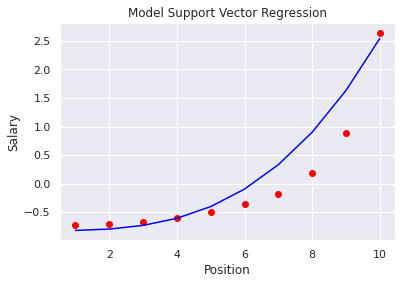

In [ ]:
kfold = KFold(2, True, 1);
score_list = [];

# Sử dụng kfold để chia dữ liệu và đánh giá mô hình
for train, test in kfold.split(X_data, sc_y_data):
    X_train, X_test = X_data[train], X_data[test];
    Y_train, Y_test = sc_y_data[train], sc_y_data[test];
    
    SCR_model.fit(X_train, Y_train);
    y_pred = SCR_model.predict(X_test)
    score_list.append(r2_score(Y_test, y_pred))

print('\tR2_Score:', np.mean(score_list))

# Visualising data
plt.scatter(X_data, sc_y_data, color='red')
plt.plot(X_data,SCR_model.predict(X_data), color='blue')
plt.title('Model Support Vector Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

### Model Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor(n_estimators = 10, random_state = 0)

	R2_Score: 0.5083381253928466


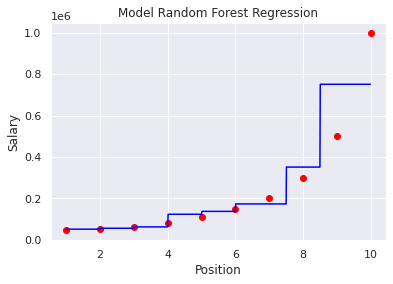

In [ ]:
kfold = KFold(2, True, 1);
score_list = [];
y_data = np.array(y_data).astype(int)
# Sử dụng kfold để chia dữ liệu và đánh giá mô hình
for train, test in kfold.split(X_data, y_data):
    X_train, X_test = X_data[train], X_data[test];
    Y_train, Y_test = y_data[train], y_data[test];
    
    RFR_model.fit(X_train, Y_train);
    y_pred = RFR_model.predict(X_test)
    score_list.append(r2_score(Y_test, y_pred))

print('\tR2_Score:', np.mean(score_list))

# Visualising data
x_grid = np.arange(min(X_data), max(X_data), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(X_data, y_data, color = 'red')
plt.plot(x_grid, RFR_model.predict(x_grid), color = 'blue')
plt.title('Model Random Forest Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()